**Table of contents**<a id='toc0_'></a>    
- [preparatory work](#toc1_)    
    - [Please ensure that you are running the following code using Python 3.8 Additionally, verify that all required libraries have been properly installed.](#toc1_1_1_)    
    - [Make sure the model is trained when running "our model" section](#toc1_1_2_)    
- [model comparison](#toc2_)    
  - [XGBoost](#toc2_1_)    
    - [model](#toc2_1_1_)    
    - [model evaluation](#toc2_1_2_)    
    - [plot](#toc2_1_3_)    
  - [LightGBM](#toc2_2_)    
    - [model](#toc2_2_1_)    
    - [model evaluation](#toc2_2_2_)    
    - [plot](#toc2_2_3_)    
  - [RF](#toc2_3_)    
    - [model](#toc2_3_1_)    
    - [model evaluation](#toc2_3_2_)    
    - [plot](#toc2_3_3_)    
  - [our model](#toc2_4_)    
    - [model](#toc2_4_1_)    
    - [model evaluation](#toc2_4_2_)    
    - [plot](#toc2_4_3_)    
  - [CatBoost](#toc2_5_)    
    - [model](#toc2_5_1_)    
    - [model evaluation](#toc2_5_2_)    
    - [plot](#toc2_5_3_)    
  - [SVM](#toc2_6_)    
    - [model](#toc2_6_1_)    
    - [model evaluation](#toc2_6_2_)    
    - [plot](#toc2_6_3_)    
  - [DT](#toc2_7_)    
    - [model](#toc2_7_1_)    
    - [model evaluation](#toc2_7_2_)    
    - [plot](#toc2_7_3_)    
  - [AdaBoost-LR](#toc2_8_)    
    - [model](#toc2_8_1_)    
    - [model evaluation](#toc2_8_2_)    
    - [plot](#toc2_8_3_)    
  - [Bagging-SVM](#toc2_9_)    
    - [model](#toc2_9_1_)    
    - [model evaluation](#toc2_9_2_)    
    - [plot](#toc2_9_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[preparatory work](#toc0_)
### <a id='toc1_1_1_'></a>[Please ensure that you are running the following code using Python 3.8. Additionally, verify that all required libraries have been properly installed.](#toc0_)
### <a id='toc1_1_2_'></a>[Make sure the model is trained when running "our model" section](#toc0_)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# <a id='toc2_'></a>[model comparison](#toc0_)

In [5]:
# data reading
data = pd.read_csv('E:/aabc\myDeepTree\data-240321/sgp.csv')
data = data.replace(-9999, float('nan'))
data.iloc[:, 0] = pd.to_numeric(data.iloc[:, 0], errors='coerce')
data = data.dropna()
data

,Bs_B,Bs_G,Bs_R,AE_BG,AE_BR,AE_GR,Bbs_B,Bbs_G,Bbs_R,bsf_B,...,transmittance_blue,transmittance_green,transmittance_red,P_Neph_Dry,T_Neph_Dry,RH_Neph_Dry,Ba_B_Weiss,Ba_G_Weiss,Ba_R_Weiss,CCN
0,43.159378,32.873775,20.416563,2.076402,2.259556,2.411959,4.657223,3.972297,3.306433,0.107908,...,0.724439,0.779187,0.831896,982.28330,24.591665,53.825000,3.683812,3.058201,2.394383,0.000000
1,41.750015,32.088740,20.824280,2.007528,2.090924,2.160319,4.692184,3.994470,2.954104,0.112388,...,0.723776,0.778570,0.831359,982.27500,24.616667,54.300000,3.629480,3.010897,2.393225,0.000000
2,42.130474,31.954027,20.211250,2.108808,2.209259,2.292844,4.482520,3.843897,3.313872,0.106396,...,0.723128,0.777963,0.830829,982.25830,24.716667,53.133330,3.530699,2.958819,2.302380,0.000000
3,41.326084,31.567007,20.493525,2.054719,2.104971,2.146785,4.566241,3.934870,2.914941,0.110493,...,0.722495,0.777367,0.830313,982.26666,24.850000,53.533333,3.494263,2.958578,2.341061,0.000000
4,40.897648,30.978632,19.532179,2.118737,2.223053,2.309854,4.530799,3.660422,3.148163,0.110784,...,0.721881,0.776787,0.829809,982.24170,24.975000,51.850002,3.171204,2.679318,2.098852,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395255,16.140312,12.129040,8.325536,2.179321,1.959910,1.777338,2.517997,1.920556,1.492676,0.156007,...,0.886238,0.906861,0.928187,959.30000,23.191658,32.950000,2.696049,2.176444,1.682870,1230.056238
1395256,20.531988,16.601131,12.699996,1.620954,1.417814,1.248781,2.865574,2.530710,2.439947,0.139566,...,0.885486,0.906236,0.927699,959.29160,23.274996,33.216667,2.957719,2.332965,1.750520,1222.837538
1395257,16.518955,13.191820,8.967399,1.715521,1.841741,1.946768,2.097123,2.088540,1.851044,0.126953,...,0.884768,0.905641,0.927231,959.32500,23.391670,33.266666,2.828076,2.243421,1.755453,1223.546427
1395258,17.065367,13.013078,8.050191,2.067798,2.269847,2.437971,2.870734,2.225497,1.571510,0.168220,...,0.884043,0.905040,0.926758,959.40000,23.433338,33.216667,2.748712,2.209734,1.746160,1181.498695


In [6]:
def remove_outliers(df):
    # Remove outliers using the 3-sigma rule
    for column in df.columns:
        mean = df[column].mean()
        std = df[column].std()
        cutoff = std * 3
        lower = mean - cutoff
        upper = mean + cutoff
        df = df[(df[column] > lower) & (df[column] < upper)]
    return df

# Apply function to remove outliers
data = remove_outliers(data)
data


,Bs_B,Bs_G,Bs_R,AE_BG,AE_BR,AE_GR,Bbs_B,Bbs_G,Bbs_R,bsf_B,...,transmittance_blue,transmittance_green,transmittance_red,P_Neph_Dry,T_Neph_Dry,RH_Neph_Dry,Ba_B_Weiss,Ba_G_Weiss,Ba_R_Weiss,CCN
0,43.159378,32.873775,20.416563,2.076402,2.259556,2.411959,4.657223,3.972297,3.306433,0.107908,...,0.724439,0.779187,0.831896,982.28330,24.591665,53.825000,3.683812,3.058201,2.394383,0.000000
1,41.750015,32.088740,20.824280,2.007528,2.090924,2.160319,4.692184,3.994470,2.954104,0.112388,...,0.723776,0.778570,0.831359,982.27500,24.616667,54.300000,3.629480,3.010897,2.393225,0.000000
2,42.130474,31.954027,20.211250,2.108808,2.209259,2.292844,4.482520,3.843897,3.313872,0.106396,...,0.723128,0.777963,0.830829,982.25830,24.716667,53.133330,3.530699,2.958819,2.302380,0.000000
3,41.326084,31.567007,20.493525,2.054719,2.104971,2.146785,4.566241,3.934870,2.914941,0.110493,...,0.722495,0.777367,0.830313,982.26666,24.850000,53.533333,3.494263,2.958578,2.341061,0.000000
4,40.897648,30.978632,19.532179,2.118737,2.223053,2.309854,4.530799,3.660422,3.148163,0.110784,...,0.721881,0.776787,0.829809,982.24170,24.975000,51.850002,3.171204,2.679318,2.098852,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395255,16.140312,12.129040,8.325536,2.179321,1.959910,1.777338,2.517997,1.920556,1.492676,0.156007,...,0.886238,0.906861,0.928187,959.30000,23.191658,32.950000,2.696049,2.176444,1.682870,1230.056238
1395256,20.531988,16.601131,12.699996,1.620954,1.417814,1.248781,2.865574,2.530710,2.439947,0.139566,...,0.885486,0.906236,0.927699,959.29160,23.274996,33.216667,2.957719,2.332965,1.750520,1222.837538
1395257,16.518955,13.191820,8.967399,1.715521,1.841741,1.946768,2.097123,2.088540,1.851044,0.126953,...,0.884768,0.905641,0.927231,959.32500,23.391670,33.266666,2.828076,2.243421,1.755453,1223.546427
1395258,17.065367,13.013078,8.050191,2.067798,2.269847,2.437971,2.870734,2.225497,1.571510,0.168220,...,0.884043,0.905040,0.926758,959.40000,23.433338,33.216667,2.748712,2.209734,1.746160,1181.498695


In [7]:
data = data[data['CCN'] >0]
# data = data.loc[0:456806,:]# The first 200,000 groups of data in the sgp
data = data.sample(n=200000, random_state=2024)
# Prepare features and target variable
X = data.drop('CCN', axis=1)  # Features
y = data['CCN']  # Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

## <a id='toc2_1_'></a>[XGBoost](#toc0_)

### <a id='toc2_1_1_'></a>[model](#toc0_)

In [ ]:
import xgboost as xgb
import time

start_time_train = time.time()

xgb_model = xgb.XGBRegressor(random_state=2024)  
xgb_model.fit(X_train, y_train) 

end_time_train = time.time()

train_time = end_time_train - start_time_train
print(f"训练时间: {train_time} 秒")

y_pred_xgb = xgb_model.predict(X_test)  
y_pred_xgb


训练时间: 2.7508249282836914 秒


array([ 318.07257,  316.97864,  827.5847 , ..., 1159.2446 ,  772.8717 ,
        415.04562], dtype=float32)

### <a id='toc2_1_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test,y_pred_xgb)
y_test = y_test.ravel()
y_pred_xgb = y_pred_xgb.ravel()

mae = np.mean(np.abs(y_test - y_pred_xgb))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_xgb) ** 2))
print("RMSE: {:.3f}".format(rmse))

r2 = r2_score(y_test, y_pred_xgb)
print("R-squared (R2): {:.3f}".format(r2))

MAE: 166.094
RMSE: 234.127
R-squared (R2): 0.828


### <a id='toc2_1_3_'></a>[plot](#toc0_)

C:\Users\26937\AppData\Local\Temp\ipykernel_7876\1699542973.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  # 设置字体和e指数格式
C:\Users\26937\AppData\Local\Temp\ipykernel_7876\1699542973.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size=14)
C:\Users\26937\AppData\Local\Temp\ipykernel_7876\1699542973.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=14)


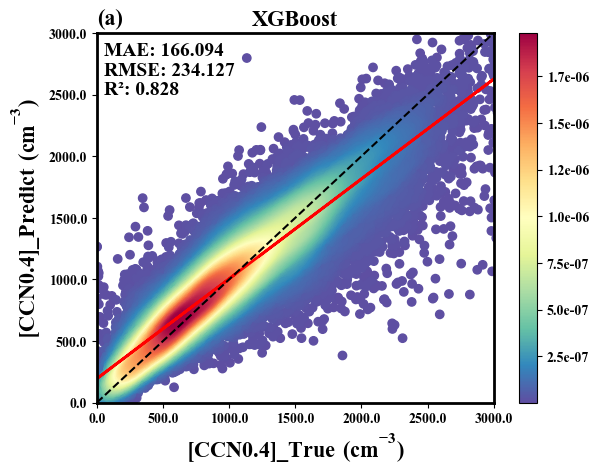

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)  
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax

x = y_test
y = y_pred_xgb

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--') 
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(a)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('XGBoost', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240520/xgb.png',dpi=600,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_2_'></a>[LightGBM](#toc0_)

### <a id='toc2_2_1_'></a>[model](#toc0_)

In [ ]:
import lightgbm as lgb
import time
start_time_train = time.time()
lightgbm_model = lgb.LGBMRegressor(random_state=2024)  
lightgbm_model.fit(X_train, y_train)  
end_time_train = time.time()

train_time = end_time_train - start_time_train
print(f"训练时间: {train_time} 秒")

y_pred_lgbm = lightgbm_model.predict(X_test)  
y_pred_lgbm



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023654 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6885
[LightGBM] [Info] Number of data points in the train set: 485888, number of used features: 27
[LightGBM] [Info] Start training from score 983.288728
训练时间: 2.1032843589782715 秒


array([ 344.99224315,  303.11503384,  835.11621253, ..., 1229.47544761,
        666.58622808,  485.96180828])

### <a id='toc2_2_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test,y_pred_lgbm)
y_test = y_test.ravel()
y_pred_lgbm = y_pred_lgbm.ravel()
mae = np.mean(np.abs(y_test - y_pred_lgbm))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_lgbm) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_lgbm)
print("R-squared (R2): {:.3f}".format(r2))

MAE: 194.941
RMSE: 270.759
R-squared (R2): 0.769


### <a id='toc2_2_3_'></a>[plot](#toc0_)

C:\Users\26937\AppData\Local\Temp\ipykernel_7876\2924390405.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  # 设置字体和e指数格式
C:\Users\26937\AppData\Local\Temp\ipykernel_7876\2924390405.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size=14)
C:\Users\26937\AppData\Local\Temp\ipykernel_7876\2924390405.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=14)


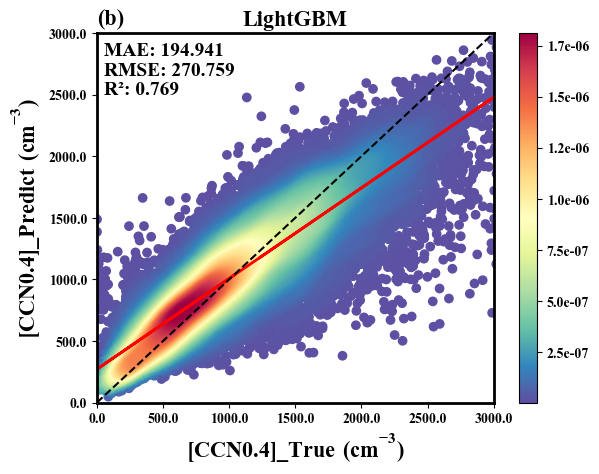

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)  
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax

x = y_test
y = y_pred_lgbm

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(b)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('LightGBM', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240520/light.png',dpi=600,bbox_inches='tight',pad_inches=0)

plt.show()


## <a id='toc2_3_'></a>[RF](#toc0_)

### <a id='toc2_3_1_'></a>[model](#toc0_)

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
import time
start_time_train = time.time()
random_forest_model = RandomForestRegressor(random_state=2024)  
random_forest_model.fit(X_train, y_train)

end_time_train = time.time()

train_time = end_time_train - start_time_train
print(f"训练时间: {train_time} 秒")

y_pred_rf = random_forest_model.predict(X_test) 
y_pred_rf

训练时间: 6066.749411344528 秒


array([ 217.98508347,  297.11020934,  961.88846969, ..., 1214.2407535 ,
        723.7005908 ,  514.4143491 ])

### <a id='toc2_3_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test, y_pred_rf)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_rf = y_pred_rf.ravel()
mae = np.mean(np.abs(y_test - y_pred_rf))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_rf) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_rf)
print("R-squared (R2): {:.3f}".format(r2))


MSE: 45872.567
MAE: 129.854
RMSE: 214.179
R-squared (R2): 0.845


### <a id='toc2_3_3_'></a>[plot](#toc0_)

C:\Users\26937\AppData\Local\Temp\ipykernel_7876\466335950.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  # 设置字体和e指数格式
C:\Users\26937\AppData\Local\Temp\ipykernel_7876\466335950.py:68: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size=14)
C:\Users\26937\AppData\Local\Temp\ipykernel_7876\466335950.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=14)


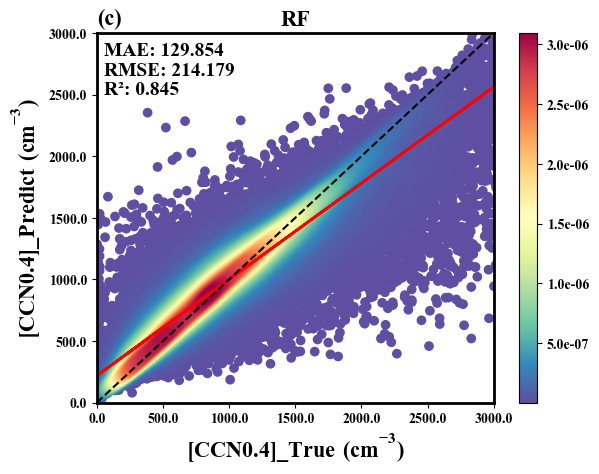

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'


def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax

x = y_test
y = y_pred_rf

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(c)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('RF', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240520/rf.png',dpi=600,bbox_inches='tight',pad_inches=0)

plt.show()


## <a id='toc2_4_'></a>[our model](#toc0_)

### <a id='toc2_4_1_'></a>[model](#toc0_)

In [3]:
# Make sure the model is trained
opt_xgb_best_params = np.load('E:/aabc/myDeepTree/data-240520/sgpxgb.npy', allow_pickle=True).item()
opt_rf_best_params = np.load('E:/aabc/myDeepTree/data-240520/sgprf.npy', allow_pickle=True).item()
opt_cb_best_params = np.load('E:/aabc/myDeepTree/data-240520/sgpcb.npy', allow_pickle=True).item()
opt_xgb_best_params

OrderedDict([('colsample_bytree', 1.0),
             ('learning_rate', 0.08370060173388362),
             ('max_depth', 13),
             ('n_estimators', 500),
             ('subsample', 1.0)])

In [10]:
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor  
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
import time

start_time_train = time.time()

xgb_best = XGBRegressor(**opt_xgb_best_params)
rf_best = RandomForestRegressor(**opt_rf_best_params)
cb_best = CatBoostRegressor(**opt_cb_best_params, verbose=0)

ensemble_model = VotingRegressor(estimators=[
    ('xgb', xgb_best),
    ('rf', rf_best),
    ('cb', cb_best)
])

ensemble_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"训练时间: {train_time} 秒")
predictions = ensemble_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

训练时间: 11632.695852518082 秒
Mean Squared Error: 54956.57845769261


训练时间: 15149.283363342285 秒
Mean Squared Error: 54975.84911037582


### <a id='toc2_4_2_'></a>[model evaluation](#toc0_)

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

ensemble_mae = mean_absolute_error(y_test, predictions)
ensemble_rmse = np.sqrt(mean_squared_error(y_test, predictions))
ensemble_r2 = r2_score(y_test, predictions)


print("Ensemble Model Performance:")
print(f"MAE: {ensemble_mae}")
print(f"RMSE: {ensemble_rmse}")
print(f"R2: {ensemble_r2}")

Ensemble Model Performance:
MAE: 155.32455370836604
RMSE: 234.42819467310798
R2: 0.8143158886131745


### <a id='toc2_4_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


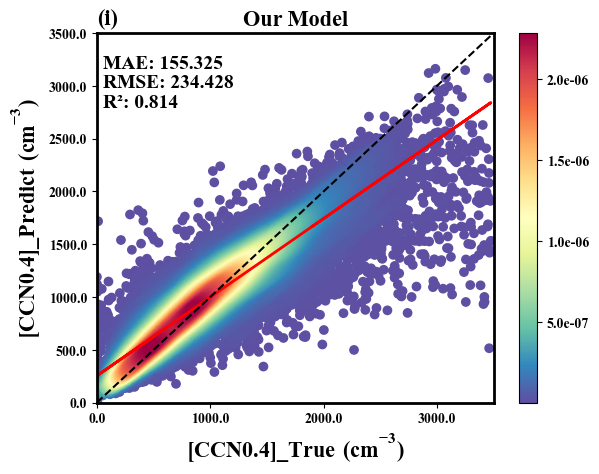

In [12]:

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'


def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10)  
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman') 

    return ax


x = y_test.to_numpy()
y = predictions

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3500], [0, 3500], 'black', lw=1.5, linestyle='--')  # 1:1
plt.axis([0, 3500, 0, 3500])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(i)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('Our Model', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.text(50,2800, text, fontsize=14, fontname='Times New Roman')
# plt.savefig('E:/aabc/summary/fig-240727/NEL.png',dpi=300,bbox_inches='tight',pad_inches=0)

plt.show()


## <a id='toc2_5_'></a>[CatBoost](#toc0_)

### <a id='toc2_5_1_'></a>[model](#toc0_)

In [ ]:
import time
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression

# CatBoost
start_time_train = time.time()
catboost_model = CatBoostRegressor(random_state=2024, verbose=0)
catboost_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"CatBoost 训练时间: {train_time} 秒")
y_pred_catboost = catboost_model.predict(X_test)



CatBoost 训练时间: 10.593994379043579 秒


### <a id='toc2_5_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test, y_pred_catboost)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_catboost = y_pred_catboost.ravel()
mae = np.mean(np.abs(y_test - y_pred_catboost))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_catboost) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_catboost)
print("R-squared (R2): {:.3f}".format(r2))


MSE: 53320.593
MAE: 163.258
RMSE: 230.913
R-squared (R2): 0.832


### <a id='toc2_5_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


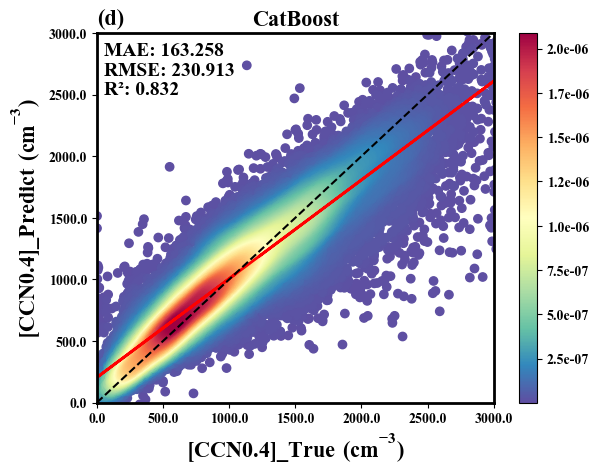

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax
x = y_test
y = y_pred_catboost

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(d)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('CatBoost', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240727/cb.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_6_'></a>[SVM](#toc0_)

### <a id='toc2_6_1_'></a>[model](#toc0_)

In [ ]:
# SVM
start_time_train = time.time()
svm_model = SVR()
svm_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"SVM 训练时间: {train_time} 秒")
y_pred_svm = svm_model.predict(X_test)



SVM 训练时间: 2029.444783449173 秒


### <a id='toc2_6_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test, y_pred_svm)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_svm = y_pred_svm.ravel()
mae = np.mean(np.abs(y_test - y_pred_svm))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_svm) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_svm)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 304684.841
MAE: 425.166
RMSE: 551.983
R-squared (R2): 0.042


### <a id='toc2_6_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


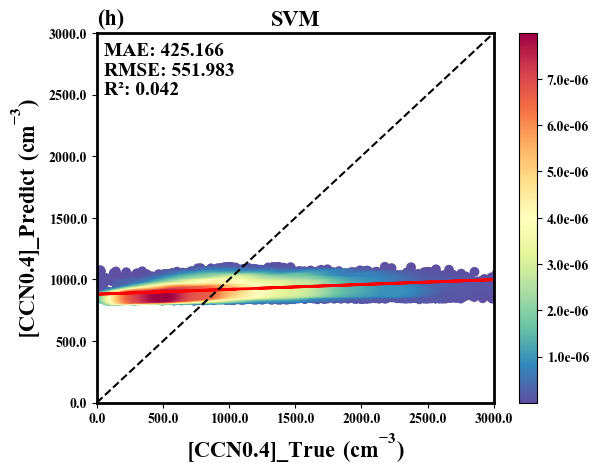

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax
x = y_test
y = y_pred_svm

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(h)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('SVM', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240727/SVM.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_7_'></a>[DT](#toc0_)

### <a id='toc2_7_1_'></a>[model](#toc0_)

In [ ]:
# 决策树
start_time_train = time.time()
dt_model = DecisionTreeRegressor(random_state=2024)
dt_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"决策树 训练时间: {train_time} 秒")
y_pred_dt = dt_model.predict(X_test)




决策树 训练时间: 30.91111183166504 秒


### <a id='toc2_7_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test, y_pred_dt)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_dt = y_pred_dt.ravel()
mae = np.mean(np.abs(y_test - y_pred_dt))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_dt) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_dt)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 77501.268
MAE: 136.782
RMSE: 278.390
R-squared (R2): 0.756


### <a id='toc2_7_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


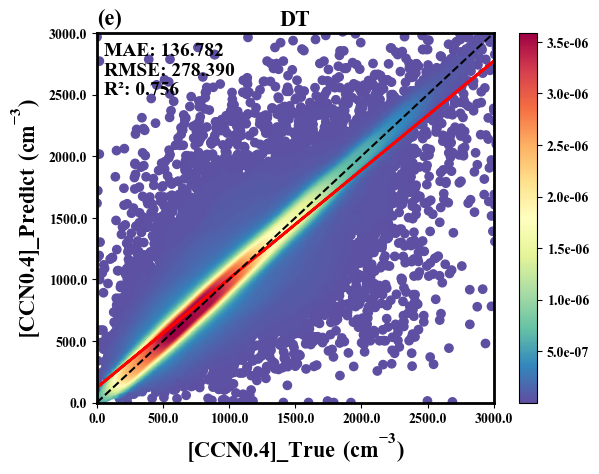

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax
x = y_test
y = y_pred_dt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(e)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('DT', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240727/DT.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_8_'></a>[AdaBoost-LR](#toc0_)

### <a id='toc2_8_1_'></a>[model](#toc0_)

In [ ]:
# AdaBoost-LR
start_time_train = time.time()
adaboost_lr_model = AdaBoostRegressor(base_estimator=LinearRegression(), random_state=2024)
adaboost_lr_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"AdaBoost-LR 训练时间: {train_time} 秒")
y_pred_adaboost_lr = adaboost_lr_model.predict(X_test)



`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


AdaBoost-LR 训练时间: 11.197057008743286 秒


### <a id='toc2_8_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test, y_pred_adaboost_lr)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_adaboost_lr = y_pred_adaboost_lr.ravel()
mae = np.mean(np.abs(y_test - y_pred_adaboost_lr))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_adaboost_lr) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_adaboost_lr)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 146800.718
MAE: 303.580
RMSE: 383.146
R-squared (R2): 0.538


### <a id='toc2_8_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


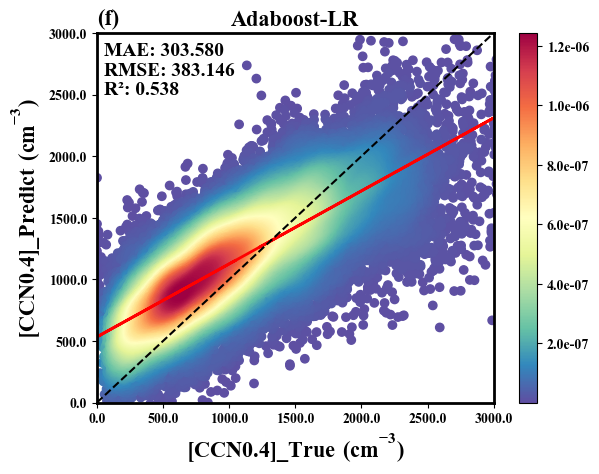

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax
x = y_test
y = y_pred_adaboost_lr

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--')  # 画1:1线
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(f)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('Adaboost-LR', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240727/Adaboost-LR.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()


## <a id='toc2_9_'></a>[Bagging-SVM](#toc0_)

### <a id='toc2_9_1_'></a>[model](#toc0_)

In [ ]:
# Bagging-SVM
start_time_train = time.time()
bagging_svm_model = BaggingRegressor(base_estimator=SVR(), random_state=2024)
bagging_svm_model.fit(X_train, y_train)
end_time_train = time.time()
train_time = end_time_train - start_time_train
print(f"Bagging-SVM 训练时间: {train_time} 秒")
y_pred_bagging_svm = bagging_svm_model.predict(X_test)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Bagging-SVM 训练时间: 17643.171610832214 秒


### <a id='toc2_9_2_'></a>[model evaluation](#toc0_)

In [ ]:
mse = mean_squared_error(y_test, y_pred_bagging_svm)
print("MSE: {:.3f}".format(mse))
y_test = y_test.ravel()
y_pred_bagging_svm = y_pred_bagging_svm.ravel()
mae = np.mean(np.abs(y_test - y_pred_bagging_svm))
print("MAE: {:.3f}".format(mae))

rmse = np.sqrt(np.mean((y_test - y_pred_bagging_svm) ** 2))
print("RMSE: {:.3f}".format(rmse))
r2 = r2_score(y_test, y_pred_bagging_svm)
print("R-squared (R2): {:.3f}".format(r2))

MSE: 304661.540
MAE: 425.182
RMSE: 551.962
R-squared (R2): 0.042


### <a id='toc2_9_3_'></a>[plot](#toc0_)

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


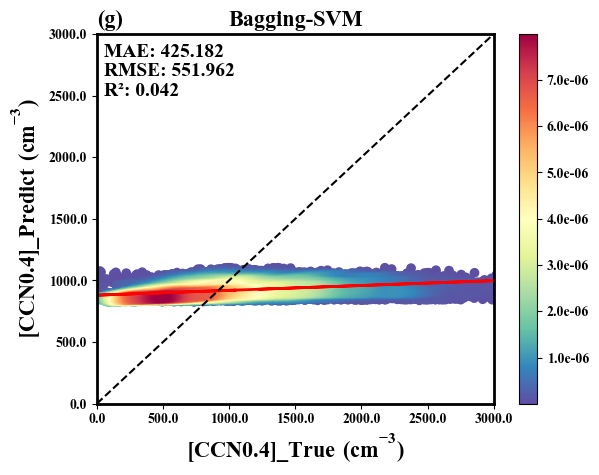

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from numpy import mean
from scipy.stats import linregress
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
# shap.summary_plot(shap_values, X_test[feature_names], show = False)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

def density_scatter(x, y, ax=None, is_cbar=False, **kwargs):
    if ax is None:
        fig, ax = plt.subplots()
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x, y, c=z, cmap='Spectral_r')

    if is_cbar:
        norm = Normalize(vmin=np.min(z), vmax=np.max(z))
        cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='Spectral_r'), ax=ax)
        cbar.ax.tick_params(labelsize=10) 
        cbar.ax.set_yticklabels(['{:.1e}'.format(t) for t in cbar.get_ticks()], fontname='Times New Roman')  

    return ax
x = y_test
y = y_pred_bagging_svm

fig = plt.figure()
ax = fig.add_subplot(111)

ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)

density_scatter(x=x, y=y, ax=ax, is_cbar=True)

slope, intercept, r_value, p_value, std_err = linregress(x, y)

regression_line = slope * x + intercept
plt.plot(x, regression_line, 'red', lw=2, label='线性回归线')

plt.plot([0, 3000], [0, 3000], 'black', lw=1.5, linestyle='--') 
plt.axis([0, 3000, 0, 3000])

ax.tick_params(axis='both', labelsize=14)

ax.set_xticklabels(ax.get_xticks(), size=14)
ax.set_yticklabels(ax.get_yticks(), size=14)

BIAS = mean(x - y)
MSE = mean_squared_error(x, y)
RMSE = np.power(MSE, 0.5)
R2 = r2_score(x, y)
MAE = mean_absolute_error(x, y)
EV = explained_variance_score(x, y)

text = f'\nMAE: {MAE:.3f}\nRMSE: {RMSE:.3f}\nR²: {R2:.3f}'
# y_ticks_ax1 = np.linspace(min(y[0:1, 0]), max(y[0:1, 0]), 5)
# plt.yticks(y_ticks_ax1,fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.yticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xticks(fontsize=10, fontname='Times New Roman', fontweight='bold')
plt.xlabel(r'[CCN0.4]_True$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.ylabel(r'[CCN0.4]_Predict$\mathregular{\ (cm^{-3})}$', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.xlabel(r'Activation Rate_True', fontsize=16, fontname='Times New Roman', fontweight='bold')
# plt.ylabel(r'Activation Rate_Predict', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('(g)', loc='left', fontsize=16, fontname='Times New Roman', fontweight='bold')
plt.title('Bagging-SVM', fontsize=16, fontname='Times New Roman', fontweight='bold')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

plt.text(50,2500, text, fontsize=14, fontname='Times New Roman')
plt.savefig('E:/aabc/summary/fig-240727/Bagging-SVM.png',dpi=300,bbox_inches='tight',pad_inches=0)
plt.show()
